### 1. 向量和矩阵操作

**创建矩阵**

In [2]:
import numpy as np

In [4]:
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [5]:
a.shape

(2, 3)

In [11]:
# 可以不指定某一个维度的值，给-1，系统自动计算维度
b = np.arange(24).reshape(2,-1,4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [8]:
#  如果维度不匹配会报错
c = np.arange(6).reshape(4,-1)

ValueError: cannot reshape array of size 6 into shape (4,newaxis)

In [12]:
# 0矩阵
np.zeros( (3,4) )

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [14]:
# 1矩阵
np.ones( (3,4) )

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [13]:
# 单位矩阵
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**矩阵运算**

In [3]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
a-b

array([20, 29, 38, 47])

In [4]:
A = np.array( [[1,1],
               [0,1]] )
B = np.array( [[2,0],
               [3,4]] )

In [5]:
# element-wise乘法
A * B

array([[2, 0],
       [0, 4]])

In [6]:
# 矩阵乘法
A.dot(B)

array([[5, 4],
       [3, 4]])

In [7]:
# 转置
B.transpose()

array([[2, 3],
       [0, 4]])

In [9]:
np.linalg.inv(B)

array([[ 5.00000000e-01,  1.85037171e-17],
       [-3.75000000e-01,  2.50000000e-01]])

### 2. 稀疏矩阵
https://docs.scipy.org/doc/scipy/reference/sparse.html#module-scipy.sparse

In [47]:
from scipy.sparse import csc_matrix
csc_matrix((3, 4), dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [50]:
row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csc_matrix((data, (row, col)), shape=(3, 3)).toarray()

array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]], dtype=int64)

In [51]:
indptr = np.array([0, 2, 3, 6]) # indices中第几个数再第几行
indices = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csc_matrix((data, indices, indptr), shape=(3, 3)).toarray()

array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]])

### 3. 统计学

**概率分布**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
from scipy.stats import norm

In [33]:
n1 = norm(0,1)
n2 = norm(2,0.1)

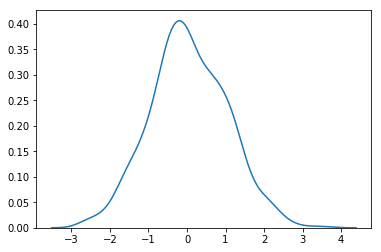

In [34]:
sns.kdeplot(n1.rvs(1000))

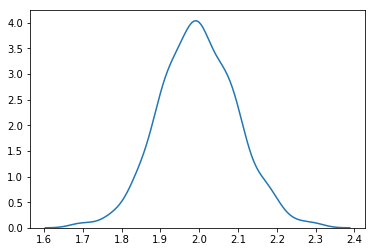

In [35]:
sns.kdeplot(n2.rvs(1000))

In [46]:
n2.cdf(2)

0.5

**假设检验**

In [63]:
from scipy import stats
np.random.seed(7654567)  # fix seed to get the same result

In [64]:
rvs = stats.norm.rvs(loc=5, scale=10, size=(50,2))

单样本检验

In [65]:
stats.ttest_1samp(rvs,5.0) # p>0.05，不拒绝

Ttest_1sampResult(statistic=array([-0.68014479, -0.04323899]), pvalue=array([0.49961383, 0.96568674]))

In [66]:
stats.ttest_1samp(rvs,0.0) # p<0.05，拒绝

Ttest_1sampResult(statistic=array([2.77025808, 4.11038784]), pvalue=array([0.00789095, 0.00014999]))

In [67]:
np.random.seed(12345678)

双独立样本：相同方差

In [71]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=1.2350576513941018, pvalue=0.21709972879206763)

双独立样本：不同方差

In [72]:
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500)
stats.ttest_ind(rvs1, rvs3, equal_var = False)

Ttest_indResult(statistic=0.30584827140623455, pvalue=0.7598083093060726)

### 官方文档
1. numpy https://docs.scipy.org/doc/numpy/user/quickstart.html
2. scipy https://docs.scipy.org/doc/scipy/reference/index.html